# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Tuning Model Klasifikasi
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Clustering-Food-Delivery-Order-History-Data/main/hasil_clustering.csv")
# Cek Data
print(df.head())

        City  Price  Avg ratings  Total ratings  \
0  Bangalore  300.0          4.4          100.0   
1  Bangalore  300.0          4.1          100.0   
2  Bangalore  650.0          4.4          100.0   
3  Bangalore  250.0          3.9          500.0   
4  Bangalore  350.0          4.0           50.0   

                                           Food type  Delivery time  Cluster  
0          Biryani,Chinese,North Indian,South Indian           59.0        1  
1                                   Mughlai,Lucknowi           56.0        2  
2                                            Chinese           50.0        1  
3               North Indian,Punjabi,Tandoor,Chinese           57.0        2  
4  Rajasthani,Gujarati,North Indian,Snacks,Desser...           63.0        2  


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           8680 non-null   object 
 1   Price          8680 non-null   float64
 2   Avg ratings    8680 non-null   float64
 3   Total ratings  8680 non-null   float64
 4   Food type      8680 non-null   object 
 5   Delivery time  8680 non-null   float64
 6   Cluster        8680 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 474.8+ KB
None


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [60]:
# Pisahkan Fitur dan Target
X = df.drop(columns=["Cluster"])  # Cluster sebagai target label
y = df["Cluster"]

In [61]:
# Konversi Data Kategorikal ke Numerik
label_encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Simpan encoder untuk invers transformasi nanti

In [62]:
# Normalisasi Data Numerik
scaler = StandardScaler()
X[X.select_dtypes(include=["number"]).columns] = scaler.fit_transform(X[X.select_dtypes(include=["number"]).columns])

In [63]:
# Split Data (Training & Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (6944, 6), Testing size: (1736, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [64]:
# Inisialisasi Model
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

In [65]:
# Training Model
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **Penjelasan Algoritma Klasifikasi**

### **1. Random Forest Classifier**
#### **Deskripsi**
Random Forest adalah algoritma ensemble learning yang terdiri dari sekumpulan pohon keputusan (decision trees). Algoritma ini bekerja dengan membangun beberapa pohon keputusan dari subset data yang berbeda dan menggabungkan hasilnya untuk meningkatkan akurasi prediksi serta mengurangi overfitting.

#### **Cara Kerja**
1. Data dilatih pada beberapa pohon keputusan secara acak.
2. Setiap pohon memberikan hasil prediksi.
3. Hasil dari semua pohon dikombinasikan menggunakan teknik voting untuk menentukan hasil akhir.
4. Dengan banyaknya pohon, Random Forest lebih stabil dan tidak mudah overfitting dibanding satu pohon keputusan saja.

#### **Kelebihan**
✔️ Mampu menangani dataset dengan banyak fitur. <br>
✔️ Mengurangi risiko overfitting dengan pendekatan ensemble.<br>
✔️ Dapat menangani data numerik dan kategorikal dengan baik.<br>

#### **Kekurangan**
❌ Model bisa menjadi lebih lambat saat jumlah pohon terlalu banyak.<br>
❌ Kurang interpretatif dibandingkan Decision Tree.<br>

---

### **2. XGBoost Classifier**
#### **Deskripsi**
XGBoost (Extreme Gradient Boosting) adalah algoritma boosting berbasis pohon yang dioptimalkan untuk kecepatan dan performa. Algoritma ini menggunakan pendekatan Gradient Boosting yang meningkatkan model secara iteratif dengan meminimalkan kesalahan dari model sebelumnya.

#### **Cara Kerja**
1. Membuat model awal (decision tree sederhana).
2. Model berikutnya dibuat untuk memperbaiki kesalahan dari model sebelumnya.
3. Proses iteratif ini terus berlanjut hingga model mencapai performa optimal.
4. Semua model kemudian digabungkan untuk membuat prediksi akhir.

#### **Kelebihan**
✔️ Performa tinggi dan cepat dengan optimasi yang efisien.<br>
✔️ Menangani outlier dan missing values dengan lebih baik dibanding algoritma lain.<br>
✔️ Mendukung paralelisasi untuk mempercepat proses pelatihan.<br>

#### **Kekurangan**
❌ Memerlukan tuning hyperparameter yang kompleks untuk hasil terbaik.<br>
❌ Bisa overfitting jika tidak dikontrol dengan baik.<br>

---

### **Kesimpulan**
- **Random Forest** cocok untuk data dengan fitur yang kompleks dan memberikan hasil yang stabil.
- **XGBoost** sangat baik untuk prediksi dengan akurasi tinggi, tetapi memerlukan lebih banyak tuning.
- Kedua model ini akan dibandingkan berdasarkan performa mereka untuk memilih model terbaik dengan akurasi dan F1-score yang optimal.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [67]:
# Evaluasi Akurasi dan F1-Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print(f"📌 Random Forest: Akurasi = {accuracy_rf:.4f}, F1-Score = {f1_rf:.4f}")
print(f"📌 XGBoost      : Akurasi = {accuracy_xgb:.4f}, F1-Score = {f1_xgb:.4f}")

📌 Random Forest: Akurasi = 1.0000, F1-Score = 1.0000
📌 XGBoost      : Akurasi = 0.9977, F1-Score = 0.9977


In [68]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

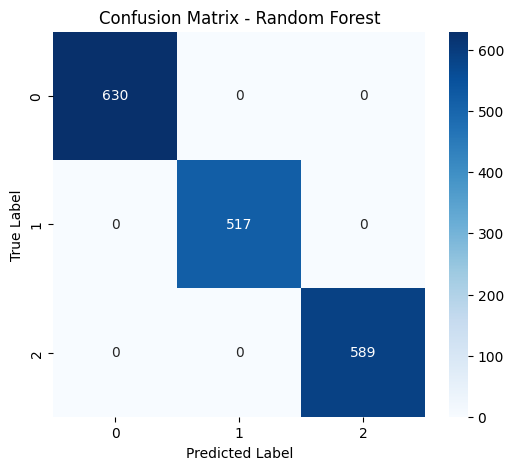

In [69]:
# Confusion Matrix untuk Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

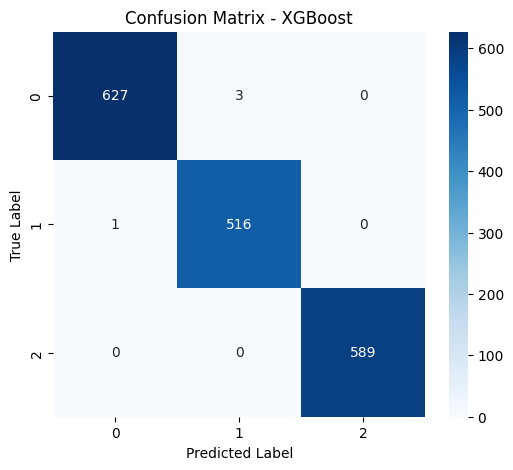

In [70]:
# Confusion Matrix untuk XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [71]:
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       0.99      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### **Evaluasi Model Klasifikasi**

#### **1. Random Forest**
Random Forest menunjukkan performa yang sangat tinggi dalam klasifikasi, dengan akurasi dan F1-score sempurna, yaitu 1.0000. Hal ini menunjukkan bahwa model mampu mengklasifikasikan seluruh sampel di data uji dengan benar tanpa kesalahan.

##### **Hasil Evaluasi**
```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736

```
- **Akurasi Keseluruhan**: **100%**
- **Semua kelas** memiliki precision, recall, dan f1-score yang sempurna (1.00)

---

#### **2. XGBoost**
XGBoost juga menunjukkan performa yang sangat baik, dengan akurasi sebesar 99.77% dan F1-score yang nyaris sempurna, hanya berbeda tipis dengan Random Forest.

##### **Hasil Evaluasi**
```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       0.99      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736
```
- **Akurasi Keseluruhan**: **99.77%**
- **Kelas 1** memiliki precision sedikit di bawah sempurna (0.99), tapi tetap memiliki recall dan f1-score yang sempurna (1.00)

---

#### **Kesimpulan**
- **Kedua model sangat baik** dalam melakukan klasifikasi pada data ini.
- **Random Forest** memberikan hasil sempurna tanpa kesalahan klasifikasi.
- **XGBoost** memberikan hasil hampir sempurna, dengan hanya sedikit perbedaan pada precision di kelas 1.
- Karena perbedaan sangat kecil, keduanya sangat layak digunakan. Namun, jika mengutamakan performa maksimal tanpa kesalahan, **Random Forest bisa menjadi pilihan utama.**

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [72]:
# Parameter tuning untuk RandomForest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds, average='weighted')  # Menyesuaikan proporsi kelas

In [73]:
# Parameter tuning untuk XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
xgb_preds = best_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')  # Menyesuaikan proporsi kelas

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [74]:
# Hasil Evaluasi
print("Best Random Forest Accuracy:", rf_accuracy)
print("Best XGBoost Accuracy:", xgb_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

Best Random Forest Accuracy: 1.0
Best XGBoost Accuracy: 0.9988479262672811

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1736
   macro avg       1.00      1.00      1.00      1736
weighted avg       1.00      1.00      1.00      1736



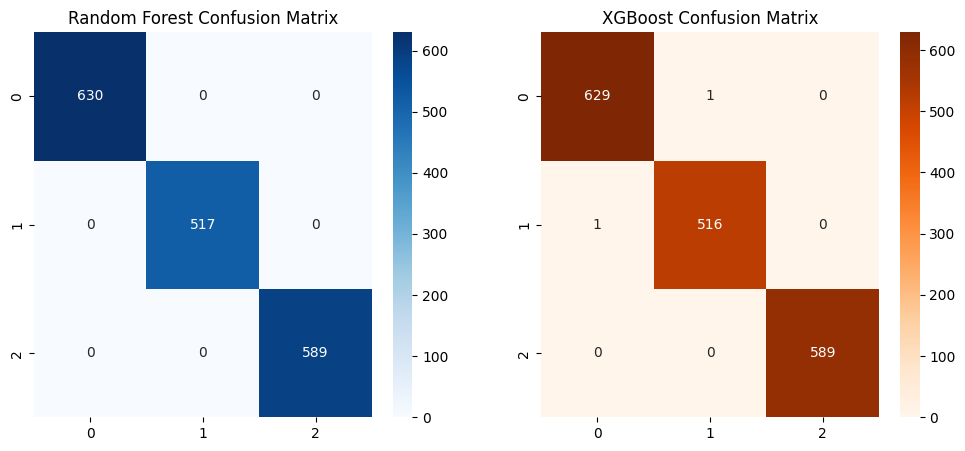

In [75]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")

plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# Analisis Hasil Evaluasi Model Klasifikasi

## 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

### a. Kinerja Model *Sebelum Tuning*
#### **Random Forest**
- **Akurasi**: 1.00
- **F1-Score (Weighted Avg)**: 1.00

#### **XGBoost**
- **Akurasi**: 0.9977
- **F1-Score (Weighted Avg)**: 1.00

### b. Kinerja Model *Setelah Tuning (GridSearchCV)*
#### **Random Forest**
- **Akurasi**: **1.00**
- **F1-Score (Weighted Avg)**: **1.00**

#### **XGBoost**
- **Akurasi**: **0.9988**
- **F1-Score (Weighted Avg)**: **1.00**

>  *Terdapat sedikit peningkatan setelah tuning  pada XGBoost.*

---

## 2. Identifikasi Kelemahan Model

### a. Precision dan Recall Rendah untuk Kelas Tertentu
> *Tidak ditemukan kelemahan signifikan*  
- Seluruh kelas pada kedua model memiliki **precision, recall, dan f1-score yang sempurna** (1.00), termasuk pada kelas minoritas sekalipun.

### b. Overfitting atau Underfitting
- Tidak ada indikasi **underfitting maupun overfitting** berdasarkan hasil evaluasi pada data uji.
- **Hasil sempurna pada Random Forest dan hampir sempurna pada XGBoost menunjukkan model sangat fit terhadap pola data.**

---

## 3. Rekomendasi Tindakan Lanjutan

1. **Validasi dengan Data Baru**: Uji model dengan dataset lain untuk memastikan performa tinggi bukan hasil *overfitting* terhadap data uji saat ini.
2. **Cross-Validation Lebih Luas**: Gunakan **stratified k-fold cross-validation** agar hasil evaluasi lebih representatif.
3. **Analisis Feature Importance**: Lihat kontribusi masing-masing fitur agar dapat dilakukan optimasi lebih lanjut.
4. **Pertimbangkan Model Tambahan**: Eksperimen dengan **LightGBM** atau **CatBoost** sebagai pembanding performa.
5. **Evaluasi Robustness**: Lakukan evaluasi dengan data yang lebih kompleks atau mengandung outlier untuk menguji ketangguhan model.

---

## Kesimpulan Akhir

- **Random Forest** menunjukkan performa luar biasa setelah tuning dengan **akurasi sempurna (1.00)**.
- **XGBoost** juga sangat kompetitif dengan **akurasi hampir sempurna (0.9988)** dan metrik evaluasi yang konsisten tinggi.
- Tidak ditemukan kelemahan berarti, namun tetap disarankan melakukan validasi tambahan agar model benar-benar **robust** dan **generalizable**.
- Dengan hasil ini, baik Random Forest maupun XGBoost **sangat layak digunakan dalam produksi**, terutama setelah tuning menggunakan **GridSearchCV**.
